<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
import tensorflow
tensorflow.__version__


'1.14.0'

In [117]:
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

np.random.seed(812)

In [118]:
from tensorflow.keras.datasets import boston_housing

In [176]:
batch_size = 32
#num_class = 10
epochs = 150

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [120]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [121]:
X_train[0:2]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00]])

In [122]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [101]:
#from sklearn import preprocessing

In [102]:
# def normalize(array):
#     mean=array.mean(axis=0)
#     std=array.std(axis=0)
#     array = (array-mean)/std
#     return array

In [103]:
# X_train = normalize(X_train)
# X_test = normalize(X_test)

In [106]:
#X_train = X_train.reshape(404, 13)
#X_test = X_test.reshape(102, 13)

In [107]:
X_train[0:2]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00]], dtype=float32)

In [108]:
X_train.shape

(404, 13)

In [140]:
y_train.shape

(404,)

In [142]:
y_train.max()

50.0

In [143]:
y_train.min()

5.0

In [144]:
y_train[:4]

array([15.2, 42.3, 50. , 21.1])

In [110]:
13*13

169

In [186]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [198]:
model = Sequential()

# Hidden
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
# Output Layer
model.add(Dense(1, activation='linear'))

model.compile(loss='MSE',
                    optimizer='adam', 
                    metrics=['MSE'])
model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_164 (Dense)            (None, 64)                896       
_________________________________________________________________
dense_165 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_166 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_167 (Dense)            (None, 1)                 17        
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


In [199]:
history = model.fit(X_train, y_train, batch_size=32, epochs=250, validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

Train on 404 samples, validate on 102 samples
Epoch 1/250
404/404 [==============================] - 1s 2ms/sample - loss: 523.8586 - mean_squared_error: 523.8586 - val_loss: 137.9906 - val_mean_squared_error: 137.9906
Epoch 2/250
404/404 [==============================] - 0s 94us/sample - loss: 104.1735 - mean_squared_error: 104.1735 - val_loss: 75.9779 - val_mean_squared_error: 75.9779
Epoch 3/250
404/404 [==============================] - 0s 91us/sample - loss: 74.0022 - mean_squared_error: 74.0022 - val_loss: 74.7882 - val_mean_squared_error: 74.7882
Epoch 4/250
404/404 [==============================] - 0s 89us/sample - loss: 67.1365 - mean_squared_error: 67.1365 - val_loss: 65.2329 - val_mean_squared_error: 65.2329
Epoch 5/250
404/404 [==============================] - 0s 109us/sample - loss: 64.8478 - mean_squared_error: 64.8478 - val_loss: 62.9250 - val_mean_squared_error: 62.9250
Epoch 6/250
404/404 [==============================] - 0s 101us/sample - loss: 63.3151 - mean_squa

In [162]:
model.evaluate(X_test, y_test)

102/102 [==============================] - 0s 323us/sample - loss: 58.9425 - mean_absolute_error: 5.8551


[58.94245132745481, 5.855076]

In [175]:
model.predict(X_test)

array([[10.266075],
       [19.99579 ],
       [23.501333],
       [20.617815],
       [26.58225 ],
       [19.82672 ],
       [27.322773],
       [26.391207],
       [24.073795],
       [19.549234],
       [10.625614],
       [23.28123 ],
       [20.043257],
       [25.22055 ],
       [18.21826 ],
       [24.062431],
       [22.285292],
       [18.055967],
       [19.424314],
       [20.85766 ],
       [15.419973],
       [12.124071],
       [22.480616],
       [22.095377],
       [28.618475],
       [20.677221],
       [23.833483],
       [42.364902],
       [12.317089],
       [23.135923],
       [20.578154],
       [13.608746],
       [29.99462 ],
       [21.58353 ],
       [18.981829],
       [13.355734],
       [15.738132],
       [11.921438],
       [20.07689 ],
       [31.707346],
       [30.351286],
       [21.630232],
       [18.576807],
       [22.864367],
       [31.632807],
       [24.104988],
       [33.396343],
       [22.047277],
       [21.188242],
       [23.687622],


In [ ]:
y_train

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [200]:
### Let's do it!
from tensorflow import keras 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import numpy as np

mnist_model = Sequential()
batch_size = 64
num_class = 10
epochs = 150

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)
# Hidden
mnist_model.add(Dense(16, input_dim=784, activation='relu'))
mnist_model.add(Dense(16, activation='relu'))
# Output Layer
mnist_model.add(Dense(10, activation='softmax'))

mnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adam', 
                    metrics=['accuracy'])
mnist_model.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 16)                12560     
_________________________________________________________________
dense_169 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_170 (Dense)            (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [201]:
history = mnist_model.fit(X_train, y_train, batch_size=32, epochs=10)
scores = mnist_model.evaluate(X_test, y_test)
print(f'{mnist_model.metrics_names[1]}: {scores[1]*100}')

Epoch 1/10
60000/60000 [==============================] - 8s 128us/sample - loss: 2.1024 - acc: 0.3081
Epoch 2/10
60000/60000 [==============================] - 7s 120us/sample - loss: 1.3057 - acc: 0.5041
Epoch 3/10
60000/60000 [==============================] - 7s 120us/sample - loss: 1.0891 - acc: 0.5929
Epoch 4/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.9831 - acc: 0.6408
Epoch 5/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.9040 - acc: 0.6861
Epoch 6/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.8416 - acc: 0.7114
Epoch 7/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.6663 - acc: 0.8131
Epoch 8/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.5553 - acc: 0.8487
Epoch 9/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.5093 - acc: 0.8625
Epoch 10/10
10000/10000 [==============================] - 1s 100us/sampl

In [59]:
scores

[0.4055367617368698, 0.8934]

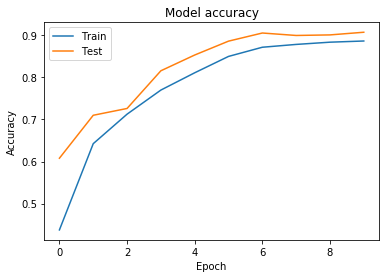

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

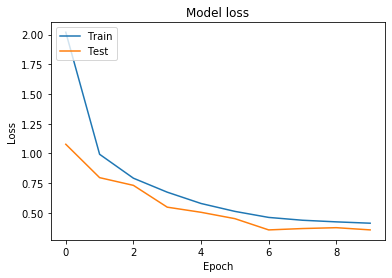

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [84]:
n_folds = 10
cv_scores, model_history = list(), list()
for _ in range(n_folds):
    # split data
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    # evaluate model
    
    batch_size = 64
    num_class = 10
    epochs = 150

    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(60000, 784)
    X_test = X_test.reshape(10000, 784)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    y_train = keras.utils.to_categorical(y_train, num_class)
    y_test = keras.utils.to_categorical(y_test, num_class)
    model = Sequential()
    print(model)
    model.add(Dense(16, input_dim=784, activation='relu'))
    model.add(Dense(16, activation='relu'))
    # Output Layer
    model.add(Dense(10, activation='softmax'))
    print(model)
    model.compile(loss='categorical_crossentropy',
                    optimizer='adam', 
                    metrics=['accuracy'])
    print(model)
    model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=0)
    test_acc = model.evaluate(X_test, y_test)
    val_acc = model.evaluate(X_test, y_test)
    print(val_acc)
    cv_scores.append(val_acc)
    model_history.append(model)
    
print('Estimated Accuracy %.3f (%.3f)' % (np.mean(cv_scores), np.std(cv_scores)))

10000/10000 [==============================] - 0s 26us/sample - loss: 0.6520 - acc: 0.7934
[0.6520065719127655, 0.7934]
10000/10000 [==============================] - 0s 24us/sample - loss: 0.5997 - acc: 0.8003
[0.5996944411277771, 0.8003]
10000/10000 [==============================] - 0s 25us/sample - loss: 0.6688 - acc: 0.7941
[0.6687782524108886, 0.7941]
10000/10000 [==============================] - 0s 24us/sample - loss: 0.3756 - acc: 0.8971
[0.3755904079258442, 0.8971]
10000/10000 [==============================] - 0s 25us/sample - loss: 0.3873 - acc: 0.8918
[0.38730874280929567, 0.8918]
10000/10000 [==============================] - 0s 22us/sample - loss: 0.7338 - acc: 0.7680
[0.7337811107635498, 0.768]
10000/10000 [==============================] - 0s 23us/sample - loss: 0.5953 - acc: 0.8234
[0.5953382644414902, 0.8234]
10000/10000 [==============================] - 0s 31us/sample - loss: 0.3687 - acc: 0.8963
[0.3687231377542019, 0.8963]
10000/10000 [===========================

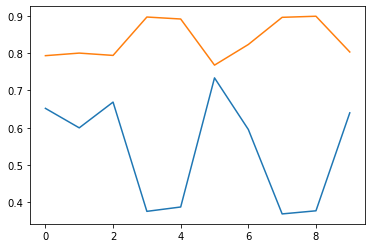

In [94]:
plt.plot(cv_scores)


In [54]:
from sklearn.cross_validation import StratifiedKFold

def load_data():
    # load your data using this function

def create model():
    # create your model using this function

def train_and_evaluate__model(model, data[train], labels[train], data[test], labels[test)):
    model.fit...
    # fit and evaluate here.

if __name__ == "__main__":
    n_folds = 10
    data, labels, header_info = load_data()
    skf = StratifiedKFold(labels, n_folds=n_folds, shuffle=True)

    for i, (train, test) in enumerate(skf):
            print "Running Fold", i+1, "/", n_folds
            model = None # Clearing the NN.
            model = create_model()
            train_and_evaluate_model(model, data[train], labels[train], data[test], labels[test))

TypeError: 'StratifiedKFold' object is not iterable

In [24]:
from sklearn.model_selection import StratifiedKFold


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.